In [1]:
%pylab inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
helix = pd.read_csv('Data/helix_parameters.csv')
helix.head() # just seeing that data was imported properly by outputing first 5 cells

,job_n,Energy,n_helices,r0_A,r0_B,r0_C,omega0,delta_omega0_A,delta_omega0_B,delta_omega0_C,...,invert_B,invert_C,z1_offset_A,z1_offset_B,z1_offset_C,delta_t_A,delta_t_B,delta_t_C,omega1,z1
0,36019,-387.167,3,6.0,6.0,6.0,0,0,120,240,...,1,0,0,0.6,-3.0,0,0,0,99.999268,1.51
1,36022,-402.606,3,6.0,6.0,6.0,0,0,120,240,...,1,0,0,0.6,0.6,0,0,0,99.999268,1.51
2,36020,-395.944,3,6.0,6.0,6.0,0,0,120,240,...,1,0,0,0.6,-1.8,0,0,0,99.999268,1.51
3,36002,-389.788,3,6.0,6.0,6.0,0,0,120,240,...,1,0,0,-3.0,-1.8,0,0,0,99.999268,1.51
4,36005,-388.016,3,6.0,6.0,6.0,0,0,120,240,...,1,0,0,-3.0,1.8,0,0,0,99.999268,1.51


In [3]:
# checking what the columns are
helix.columns

Index([u'job_n', u'Energy', u'n_helices', u'r0_A', u'r0_B', u'r0_C', u'omega0',
       u'delta_omega0_A', u'delta_omega0_B', u'delta_omega0_C', u'z0_offset_A',
       u'z0_offset_B', u'z0_offset_C', u'helix1 phase', u'helix 2 phase',
       u'helix3 phase', u'invert_A', u'invert_B', u'invert_C', u'z1_offset_A',
       u'z1_offset_B', u'z1_offset_C', u'delta_t_A', u'delta_t_B',
       u'delta_t_C', u'omega1', u'z1'],
      dtype='object')

In [4]:
# selecting a couple columns
couple_columns = helix[['Energy', 'helix3 phase','helix 2 phase', 'helix1 phase']]
couple_columns.head()

,Energy,helix3 phase,helix 2 phase,helix1 phase
0,-387.167,0,0,0
1,-402.606,0,0,0
2,-395.944,0,0,0
3,-389.788,0,0,0
4,-388.016,0,0,0


In [5]:
# selecting same columns a different way
helix.ix[:,['Energy', 'helix3 phase','helix 2 phase', 'helix1 phase']].head()

,Energy,helix3 phase,helix 2 phase,helix1 phase
0,-387.167,0,0,0
1,-402.606,0,0,0
2,-395.944,0,0,0
3,-389.788,0,0,0
4,-388.016,0,0,0


In [6]:
# Correlations
from pandas.tools.plotting import scatter_matrix

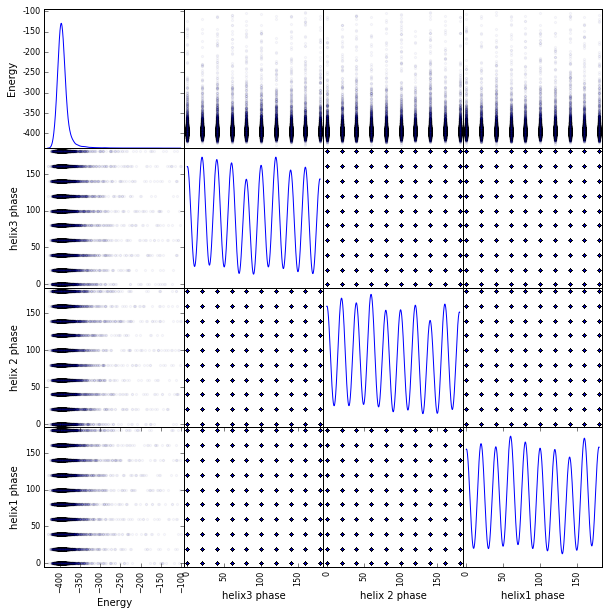

In [7]:
# correlations. you can also have hist on the diagonal
scatter_matrix(couple_columns,alpha=0.03, figsize=(10, 10), diagonal='kde');

In [8]:
# Now 3D Plots

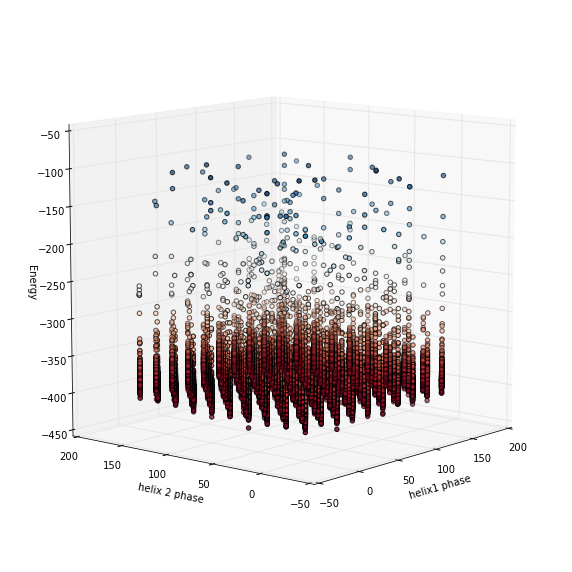

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# c is the variable to color map

# reference for cmap. note cmap and c are different!
# http://matplotlib.org/examples/color/colormaps_reference.html
ax.scatter(couple_columns[['helix1 phase']], couple_columns[['helix 2 phase']], couple_columns[['Energy']], marker='o', c=couple_columns[['Energy']], cmap="RdBu");

ax.set_xlabel('helix1 phase');
ax.set_ylabel('helix 2 phase');
ax.set_zlabel('Energy');

# change view angle 
# http://infamousheelfilcher.blogspot.com/2013/02/changing-viewing-angle-of-matplotlib.html
ax.view_init(azim = 180+40,elev = 10)

## Was this Cell below what you wanted? 

In [10]:
np.unique(couple_columns[['helix1 phase']])

array([  0,  20,  40,  60,  80, 100, 120, 140, 160, 180])

In [11]:
couple_columns[['helix1 phase']].min()[0], couple_columns[['helix1 phase']].max()[0]

(0, 180)

In [28]:
(couple_columns[['Energy']] - couple_columns[['Energy']].mean()).min()

Energy   -37.476067
dtype: float64

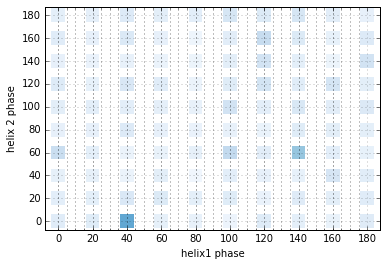

In [26]:
import numpy as np                                                               
import matplotlib.pyplot as plt                                                                                                                                 

fig = plt.figure()                                                               
ax = fig.add_subplot(1,1,1)                                                      

# major ticks every 20, minor ticks every 5                                      
major_ticks = np.arange(0, 200, 20)                                              
minor_ticks = np.arange(0, 180, 5)                                               

# remove the mean for the c
low = (couple_columns[['Energy']] - couple_columns[['Energy']].mean()).min()[0]
high = (couple_columns[['Energy']] - couple_columns[['Energy']].mean()).max()[0]
ax.scatter(couple_columns[['helix1 phase']], couple_columns[['helix 2 phase']], c=(couple_columns[['Energy']] - couple_columns[['Energy']].mean()), edgecolors='none',vmin = low, vmax = high, cmap = 'Blues', marker = 's',s = 190)
ax.set_xlabel('helix1 phase');
ax.set_ylabel('helix 2 phase');
ax.set_xlim((0-7.5,180+7.5))
ax.set_ylim((0-7.5,180+7.5))
ax.set_xticks(major_ticks)                                                       
ax.set_xticks(minor_ticks, minor=True)                                           
ax.set_yticks(major_ticks)                                                                                                 

# and a corresponding grid                                                       
ax.grid(which='both')                                                                                                           
ax.grid(which='major', alpha=0.5)                                                
plt.show()

In [38]:
couple_columns[['Energy']] - couple_columns[['Energy']].mean()
def sigmoid(x):
    return 1 / (1 + math.exp(-x))
#(couple_columns[['Energy']] - couple_columns[['Energy']].mean()).apply(lambda x: sigmoid(x))
Energy = pd.DataFrame(data = (couple_columns[['Energy']] - couple_columns[['Energy']].mean())['Energy'].apply(lambda x: sigmoid(x)))

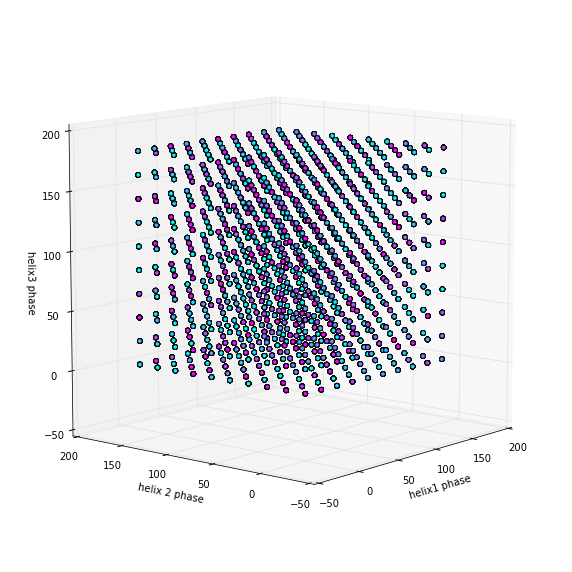

In [43]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# c is the variable to color map

# reference for cmap. note cmap and c are different!
# http://matplotlib.org/examples/color/colormaps_reference.html
ax.scatter(couple_columns[['helix1 phase']], couple_columns[['helix 2 phase']], couple_columns[['helix3 phase']], marker='o', c=Energy, cmap="cool");

ax.set_xlabel('helix1 phase');
ax.set_ylabel('helix 2 phase');
ax.set_zlabel('helix3 phase');

# change view angle 
# http://infamousheelfilcher.blogspot.com/2013/02/changing-viewing-angle-of-matplotlib.html
ax.view_init(azim = 180+40,elev = 10)

In [64]:
columns = ['helix1 phase', 'helix 2 phase', 'helix3 phase']

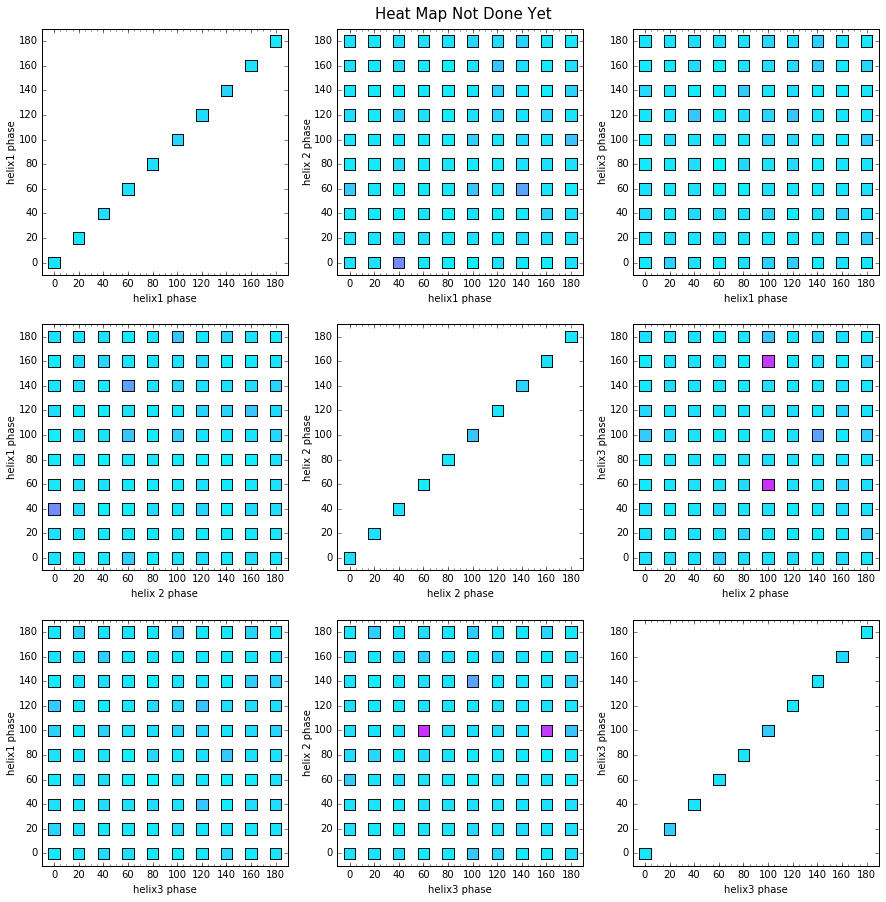

In [75]:
import numpy as np                                                               
import matplotlib.pyplot as plt                                                                                                                                 

# remove the mean for the c
low = (couple_columns[['Energy']] - couple_columns[['Energy']].mean()).min()[0]
high = (couple_columns[['Energy']] - couple_columns[['Energy']].mean()).max()[0]

intensity = (couple_columns[['Energy']] - couple_columns[['Energy']].mean())

fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (15,15));
fig.suptitle('Heat Map Not Done Yet', size = 15, x = .515, y=.92)

for i in range(0, len(columns)):
    for j in range(0, len(columns)):
        axes[i,j].scatter(columns[i], columns[j], data = couple_columns, c = intensity,  marker = 's', alpha = .8,vmin = low, vmax = high, cmap="cool", s = 130);
        axes[i,j].set_xlabel(columns[i], fontsize=10);
        axes[i,j].set_ylabel(columns[j], fontsize=10);
        axes[i,j].set_xlim((0-10,180+10));
        axes[i,j].set_ylim((0-10,180+10));
        axes[i,j].yaxis.set_label_coords(-.1,.5)
        axes[i,j].set_xticks(major_ticks);                                                       
        axes[i,j].set_xticks(minor_ticks, minor=True);                                       
        axes[i,j].set_yticks(major_ticks);     
plt.savefig('foo.png')
#ax.scatter(couple_columns[['helix1 phase']], couple_columns[['helix 2 phase']], c=color,vmin = low, vmax = high, cmap = 'Blues', marker = 's',s = 190)